## Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Load The Dataset

In [10]:
df = pd.read_excel("./Output1.xlsx")
df.shape

(74303, 22)

In [12]:
df.columns

Index(['year', 'type_of_violence', 'side_a', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'where_coordinates',
       'latitude', 'longitude', 'country', 'region', 'date_start', 'date_end',
       'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best',
       'high', 'low'],
      dtype='object')

In [13]:
df.head()

,year,type_of_violence,side_a,side_b,number_of_sources,source_article,source_office,source_date,where_coordinates,latitude,...,region,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,2018,State,Government of Turkey,PKK,1,"""National Iraqi News Agency,2018-05-30,Turkey ...",National Iraqi News Agency,2018-05-30,Tunceli province,39.083333,...,Middle East,2018-05-30,2018-05-30,0,1,0,0,1,1,1
1,2018,State,Government of Turkey,PKK,1,"""Sputnik News Service,2018-08-15,Turkish Force...",Sputnik News Service,2018-08-15,Van province,38.407357,...,Middle East,2018-08-15,2018-08-15,0,1,0,0,1,1,1
2,2018,State,Government of Turkey,PKK,1,"""People’s Defense Forces,2018-07-02,http://hpg...",People’s Defense Forces,2018-07-02,Şırnak province,37.449444,...,Middle East,2018-07-02,2018-07-02,0,1,0,0,1,1,1
3,2018,State,Government of Turkey,PKK,1,"""People’s Defense Forces,2018-02-02,View Arara...",People’s Defense Forces,2018-02-02,Osmaniye province,37.228056,...,Middle East,2018-02-02,2018-02-02,0,1,0,0,1,1,1
4,2018,State,Government of Turkey,PKK,1,"""People’s Defense Forces,2018-11-01,http://hpg...",People’s Defense Forces,2018-11-01,Batman province,38.081944,...,Middle East,2018-11-01,2018-11-01,0,1,0,0,1,1,1


## Reorganize and Group The Dataset

In [15]:
country_df = df.groupby(['country']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
country_df.head()

deaths_a                     deaths_b                     \
                 sum min   max      mean      sum min  max      mean   
country                                                                
Afghanistan    18528   0  1562  1.113462    88190   0  292  5.299880   
Algeria           30   0     7  0.666667       71   0    8  1.577778   
Angola             1   0     1  0.015873       18   0    2  0.285714   
Armenia           42   0    14  1.555556      125   0   35  4.629630   
Australia          0   0     0  0.000000        1   0    1  0.500000   

            deaths_unknown                       best                      
                       sum min  max      mean     sum min   max      mean  
country                                                                    
Afghanistan           1640   0  144  0.098558  116089   0  1562  6.976502  
Algeria                  1   0    1  0.022222     110   0    11  2.444444  
Angola                  48   0   19  0.761905     112   0    19  1.777778  
Armenia                  2   0    2  0.074074     177   1    49  6.555556  
Australia                0   0    0  0.000000       2   1     1  1.000000

In [18]:
country_df.loc["Algeria"]["best"]

sum     110.000000
min       0.000000
max      11.000000
mean      2.444444
Name: Algeria, dtype: float64

In [19]:
year_df = df.groupby(['year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
year_df.head()

deaths_a                     deaths_b                     deaths_unknown  \
          sum min   max      mean      sum min   max      mean            sum   
year                                                                            
2018    18259   0   227  1.394349    35225   0   456  2.689958          18412   
2019    14208   0   209  1.042559    35309   0   200  2.590916          18223   
2020    21180   0  2869  1.601755    28634   0  2630  2.165469          23537   
2021    32740   0  8355  1.947419    45630   0  1504  2.714133          27097   
2022    38274   0  4496  2.181476    26642   0  6916  1.518495         138042   

                             best                        
     min    max      mean     sum min    max       mean  
year                                                     
2018   0   1906  1.406033   86172   0   1906   6.580527  
2019   0    739  1.337173   79425   0    739   5.828075  
2020   0   1162  1.780005   87310   0   5502   6.602889  
2021   0    700  1.611765  121257   0   8355   7.212527  
2022   0  75340  7.867883  237912   0  75340  13.560103

In [33]:
region_df = df.groupby(['region']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
region_df.head()

deaths_a                     deaths_b                      \
                 sum min   max      mean      sum min   max      mean   
region                                                                  
Africa         21235   0   690  1.207838    33524   0   300  1.906831   
Americas         730   0    21  0.052270      943   0    62  0.067521   
Asia           21867   0  1562  0.955058    93656   0   292  4.090496   
Europe         34461   0  4496  5.936434    18325   0  6916  3.156761   
Middle East    46368   0  8355  3.299039    24992   0  1504  1.778157   

            deaths_unknown                         best                        
                       sum min    max      mean     sum min    max       mean  
region                                                                         
Africa              118113   0  75340  6.718219  213481   0  75340  12.142711  
Americas             79676   0   1906  5.704998   83209   0   1906   5.957969  
Asia                  2552   0    144  0.111461  130019   0   1562   5.678677  
Europe               18870   0  16368  3.250646   91772   0  16368  15.809130  
Middle East           6100   0    220  0.434009   93595   0   8355   6.659196

In [34]:
regionYear_df = df.groupby(['region', 'year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
regionYear_df.head()

deaths_a                    deaths_b                     \
                 sum min  max      mean      sum min  max      mean   
region year                                                           
Africa 2018     3152   0  175  1.116147     5087   0  200  1.801346   
       2019     2743   0   71  0.948807     4808   0   77  1.663092   
       2020     3537   0  207  0.983319     6505   0  127  1.808451   
       2021     8457   0  690  2.205215     8254   0  300  2.152282   
       2022     3346   0  114  0.754623     8870   0  200  2.000451   

            deaths_unknown                          best                        
                       sum min    max       mean     sum min    max       mean  
region year                                                                     
Africa 2018           3502   0    338   1.240085   15911   0    348   5.634207  
       2019           3231   0    219   1.117606   15937   0    219   5.512625  
       2020           3588   0    760   0.997498   23088   0    760   6.418682  
       2021           4792   0    700   1.249544   32472   0    700   8.467275  
       2022         103000   0  75340  23.229590  126073   0  75340  28.433243

In [21]:
countryYear_df = df.groupby(['country', 'year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
countryYear_df.head(20)

deaths_a                     deaths_b                      \
                      sum min   max      mean      sum min  max       mean   
country     year                                                             
Afghanistan 2018     4298   0   150  1.154445    19877   0  292   5.338974   
            2019     4568   0   126  0.975651    23815   0  100   5.086501   
            2020     5715   0  1562  1.722942    13341   0  170   4.022008   
            2021     3526   0    65  0.781472    30824   0  190   6.831560   
            2022      421   0    39  1.036946      333   0   43   0.820197   
Algeria     2018       15   0     7  1.500000       17   0    8   1.700000   
            2019        0   0     0  0.000000       14   0    3   1.555556   
            2020        5   0     2  0.294118       23   0    3   1.352941   
            2021        5   0     2  0.833333        8   0    4   1.333333   
            2022        5   0     3  1.666667        9   0    7   3.000000   
Angola      2018        0   0     0  0.000000        1   0    1   0.166667   
            2019        1   0     1  0.090909        9   0    2   0.818182   
            2020        0   0     0  0.000000        7   0    2   0.269231   
            2021        0   0     0  0.000000        0   0    0   0.000000   
            2022        0   0     0  0.000000        1   0    1   0.062500   
Armenia     2018        0   0     0  0.000000        1   1    1   1.000000   
            2019        0   0     0  0.000000        1   0    1   0.500000   
            2020        1   0     1  0.125000        2   0    2   0.250000   
            2021        1   0     1  0.125000        9   0    3   1.125000   
            2022       40   0    14  5.000000      112   1   35  14.000000   

                 deaths_unknown                      best                       
                            sum min  max      mean    sum min   max       mean  
country     year                                                                
Afghanistan 2018            856   0  139  0.229922  26889   0   576   7.222401  
            2019            293   0   26  0.062580  30435   0   130   6.500427  
            2020            131   0   26  0.039494  20834   0  1562   6.280977  
            2021            286   0  144  0.063387  36386   0   190   8.064273  
            2022             74   0   26  0.182266   1545   0    66   3.805419  
Algeria     2018              1   0    1  0.100000     35   0    11   3.500000  
            2019              0   0    0  0.000000     15   1     3   1.666667  
            2020              0   0    0  0.000000     28   1     3   1.647059  
            2021              0   0    0  0.000000     18   1     6   3.000000  
            2022              0   0    0  0.000000     14   3     7   4.666667  
Angola      2018              0   0    0  0.000000     24   0    14   4.000000  
            2019             15   0   15  1.363636     26   0    15   2.363636  
            2020             14   0   14  0.538462     29   0    14   1.115385  
            2021              0   0    0  0.000000     13   1    10   3.250000  
            2022             19   0   19  1.187500     20   0    19   1.250000  
Armenia     2018              0   0    0  0.000000      1   1     1   1.000000  
            2019              0   0    0  0.000000      2   1     1   1.000000  
            2020              2   0    2  0.250000     10   1     2   1.250000  
            2021              0   0    0  0.000000     10   1     3   1.250000  
            2022              0   0    0  0.000000    154   1    49  19.250000

In [22]:
countryYear_df.loc["Ukraine"]

deaths_a                     deaths_b                     deaths_unknown  \
          sum min   max      mean      sum min   max      mean            sum   
year                                                                            
2018       99   0     5  0.647059       74   0     7  0.483660             19   
2019      116   0     4  0.582915      173   0    11  0.869347              0   
2020       75   0     5  0.517241       99   0     5  0.682759              1   
2021       93   0     4  0.556886       95   0     5  0.568862              2   
2022    30471   0  4496  6.317852    13509   0  6916  2.800954          18843   

                            best                        
     min    max      mean    sum min    max       mean  
year                                                    
2018   0      8  0.124183    243   0      8   1.588235  
2019   0      0  0.000000    311   1     11   1.562814  
2020   0      1  0.006897    196   0      6   1.351724  
2021   0      1  0.011976    208   0      5   1.245509  
2022   0  16368  3.906904  82609   0  16368  17.128136

In [24]:
regionCountryYear_df = df.groupby(['region', 'country', 'year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
regionCountryYear_df.head(20)

deaths_a                   deaths_b           \
                              sum min max      mean      sum min  max   
region country      year                                                
Africa Algeria      2018       15   0   7  1.500000       17   0    8   
                    2019        0   0   0  0.000000       14   0    3   
                    2020        5   0   2  0.294118       23   0    3   
                    2021        5   0   2  0.833333        8   0    4   
                    2022        5   0   3  1.666667        9   0    7   
       Angola       2018        0   0   0  0.000000        1   0    1   
                    2019        1   0   1  0.090909        9   0    2   
                    2020        0   0   0  0.000000        7   0    2   
                    2021        0   0   0  0.000000        0   0    0   
                    2022        0   0   0  0.000000        1   0    1   
       Benin        2019        0   0   0  0.000000        0   0    0   
                    2020        1   1   1  1.000000        0   0    0   
                    2021        4   0   2  0.666667        6   0    3   
                    2022       17   0   6  2.125000       11   0    8   
       Burkina Faso 2018       66   0  10  1.015385       35   0    8   
                    2019      142   0  24  0.639640      201   0   30   
                    2020      179   0  14  1.078313      328   0   47   
                    2021      364   0  53  1.905759      538   0   58   
                    2022      457   0  27  1.920168     1258   0  115   
       Burundi      2018        2   0   2  0.033898        2   0    1   

                                   deaths_unknown                    best      \
                              mean            sum min max      mean   sum min   
region country      year                                                        
Africa Algeria      2018  1.700000              1   0   1  0.100000    35   0   
                    2019  1.555556              0   0   0  0.000000    15   1   
                    2020  1.352941              0   0   0  0.000000    28   1   
                    2021  1.333333              0   0   0  0.000000    18   1   
                    2022  3.000000              0   0   0  0.000000    14   3   
       Angola       2018  0.166667              0   0   0  0.000000    24   0   
                    2019  0.818182             15   0  15  1.363636    26   0   
                    2020  0.269231             14   0  14  0.538462    29   0   
                    2021  0.000000              0   0   0  0.000000    13   1   
                    2022  0.062500             19   0  19  1.187500    20   0   
       Benin        2019  0.000000              0   0   0  0.000000     1   1   
                    2020  0.000000              0   0   0  0.000000     1   1   
                    2021  1.000000              0   0   0  0.000000    11   1   
                    2022  1.375000              1   0   1  0.125000    30   1   
       Burkina Faso 2018  0.538462              0   0   0  0.000000   195   0   
                    2019  0.905405              7   0   6  0.031532  1246   0   
                    2020  1.975904             95   0  22  0.572289  1167   0   
                    2021  2.816754             57   0  20  0.298429  1458   0   
                    2022  5.285714             90   0  28  0.378151  2597   0   
       Burundi      2018  0.033898              0   0   0  0.000000   113   0   

                                          
                          max       mean  
region country      year                  
Africa Algeria      2018   11   3.500000  
                    2019    3   1.666667  
                    2020    3   1.647059  
                    2021    6   3.000000  
                    2022    7   4.666667  
       Angola       2018   14   4.000000  
                    2019   15   2.363636  
                    2020   14   1.115385  
        

In [32]:
regionCountryYear_df.loc["Europe"].loc["Ukraine"]

deaths_a                     deaths_b                     deaths_unknown  \
          sum min   max      mean      sum min   max      mean            sum   
year                                                                            
2018       99   0     5  0.647059       74   0     7  0.483660             19   
2019      116   0     4  0.582915      173   0    11  0.869347              0   
2020       75   0     5  0.517241       99   0     5  0.682759              1   
2021       93   0     4  0.556886       95   0     5  0.568862              2   
2022    30471   0  4496  6.317852    13509   0  6916  2.800954          18843   

                            best                        
     min    max      mean    sum min    max       mean  
year                                                    
2018   0      8  0.124183    243   0      8   1.588235  
2019   0      0  0.000000    311   1     11   1.562814  
2020   0      1  0.006897    196   0      6   1.351724  
2021   0      1  0.011976    208   0      5   1.245509  
2022   0  16368  3.906904  82609   0  16368  17.128136

## Filter Data For Ukraine

In [39]:
ukraine_df = df.loc[df["country"] == "Ukraine"]

In [42]:
ukraine_df = ukraine_df.loc[ukraine_df["year"] == 2022]

In [44]:
ukraine_df.shape

(4823, 22)

## Perform Clustering Over Latitude-Longitude Within Ukraine

In [49]:
kmeans4 = KMeans(n_clusters=4, random_state=42)

X = ukraine_df[['latitude', 'longitude']]

kmeans4.fit(X)

kmeans4.labels_

c:\Users\HP\anaconda3\envs\mlds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, ..., 0, 0, 0])

In [50]:
ukraine_df['cluster'] = kmeans4.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_244264\1949602632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine_df['cluster'] = kmeans4.labels_


In [57]:
ukraine_df.head()

,year,type_of_violence,side_a,side_b,number_of_sources,source_article,source_office,source_date,where_coordinates,latitude,...,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,cluster
25921,2022,State,Government of Russia (Soviet Union),Government of Ukraine,1,"""Look for your own,2022-03-01,https://t.me/rf2...",Look for your own,2022-03-01,Ukraine,49.000000,...,2022-03-01,2022-03-01,9,0,0,0,9,10,9,2
25922,2022,State,Government of Russia (Soviet Union),Government of Ukraine,1,"""Look for your own,2022-03-01,https://t.me/rf2...",Look for your own,2022-03-01,Kharkiv town,49.980810,...,2022-03-01,2022-03-01,2,0,0,0,2,2,2,3
25923,2022,State,Government of Russia (Soviet Union),Government of Ukraine,1,"""Look for your own,2022-03-01,https://t.me/rf2...",Look for your own,2022-03-01,Bucha town,50.551488,...,2022-03-01,2022-03-01,2,0,0,0,2,2,2,2
25924,2022,State,Government of Russia (Soviet Union),Government of Ukraine,1,"""Look for your own,2022-03-01,https://t.me/rf2...",Look for your own,2022-03-01,Borodianka village,50.644840,...,2022-03-01,2022-03-01,1,0,0,0,1,1,1,2
25925,2022,State,Government of Russia (Soviet Union),Government of Ukraine,1,"""Ukrinform: news,2022-03-15,During the day, th...",Ukrinform: news,2022-03-15,Petrovskyi town,47.945420,...,2022-03-14,2022-03-14,0,0,1,0,1,1,1,0


In [52]:
# ukraine_df.to_csv("UkraineClustered.csv")

## Explore The Clusters

In [53]:
ukraine_df['cluster'].value_counts()

0    2719
2     730
1     724
3     650
Name: cluster, dtype: int64

In [54]:
ukraine_df[ukraine_df['cluster']==0].describe()

,year,number_of_sources,latitude,longitude,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,cluster
count,2719.0,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.0
mean,2022.0,1.275101,48.374306,37.996275,6.755057,0.760206,5.735197,6.227657,19.478117,44.980875,12.439132,0.0
std,0.0,0.766341,0.577932,0.534420,109.680308,8.541412,124.093459,313.942110,354.697174,1287.231641,278.280258,0.0
min,2022.0,1.000000,46.755100,36.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,2022.0,1.000000,47.945420,37.690000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
50%,2022.0,1.000000,48.210000,37.960810,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.0
75%,2022.0,1.000000,48.871678,38.280000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.0
max,2022.0,16.000000,50.044650,39.677000,4496.000000,434.000000,5964.000000,16368.000000,16368.000000,64618.000000,13107.000000,0.0


c:\Users\HP\anaconda3\envs\mlds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


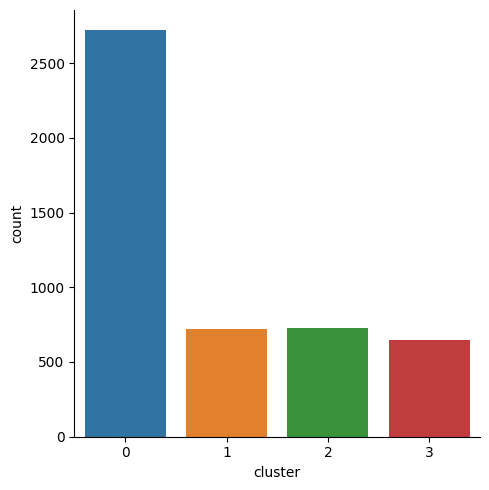

In [55]:
sns.catplot(data=ukraine_df, x='cluster', kind='count')

c:\Users\HP\anaconda3\envs\mlds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


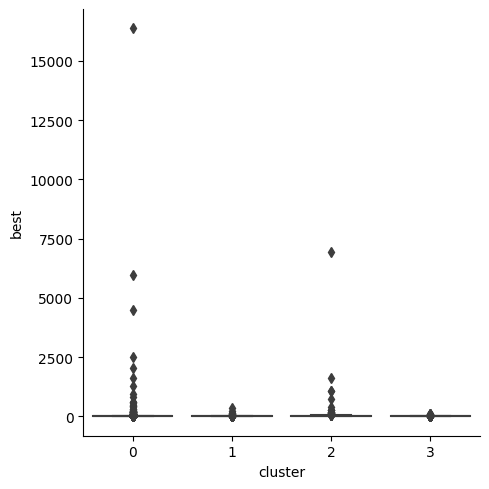

In [56]:
sns.catplot(data=ukraine_df, y='best', x='cluster', kind='box')